# Sparse Hebbian Learning: basics of coding

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HEH']
homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'HAP', 'HEH']

record_num_batches = 2**12

seed = 42
np.random.seed(seed)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

In [5]:
!ls -l {shl.cache_dir}/{tag}*

-rw-r--r--  1 laurentperrinet  staff    1953587 May 16 10:31 cache_dir/coding_HAP_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    1953587 May 16 10:51 cache_dir/coding_HEH_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    1953588 May 16 10:27 cache_dir/coding_None_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    1953593 May 16 10:55 cache_dir/coding_Olshausen_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  169827968 May 14 22:29 cache_dir/coding_data.npy
-rw-r--r--  1 laurentperrinet  staff  169827968 May 16 10:24 cache_dir/coding_test_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  8.184427416464041e-06  +/-  0.005576408526073966
average energy of data =  0.17406514625725478 +/- 0.06787452080620018


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  1.7222560367317163e-05 +/- 0.00124144554106079
average energy of filters =  1.0 +/- 4.931176659116949e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  2.192591174165717e-05 +/- 0.0013090849134379777
average energy of filters =  1.0 +/- 4.3595874271640356e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -1.191802093540297e-05 +/- 0.001192069250547864
average energy of filters =  1.0 +/- 4.129104294410826e-17


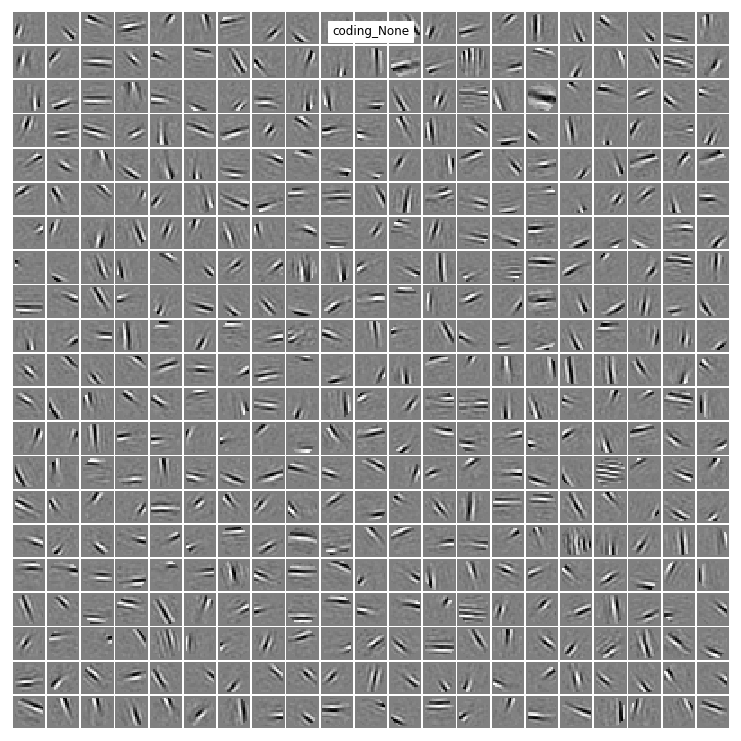

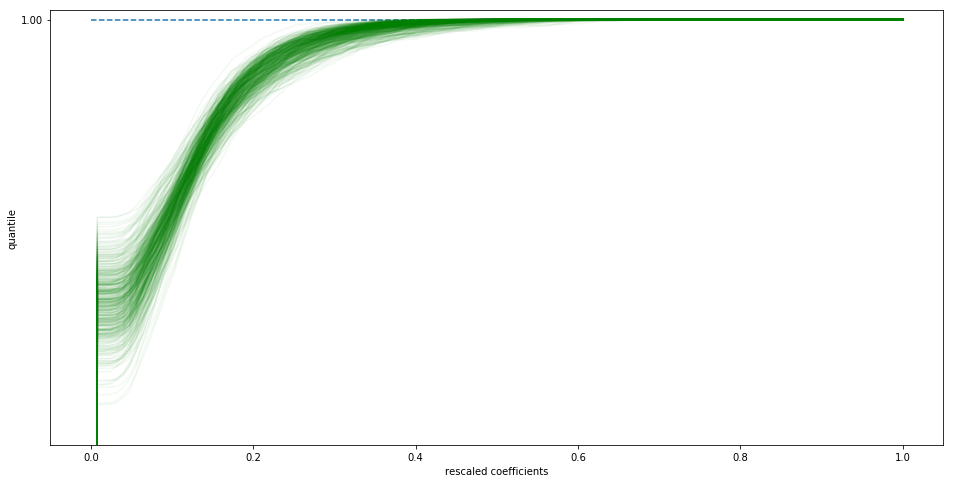

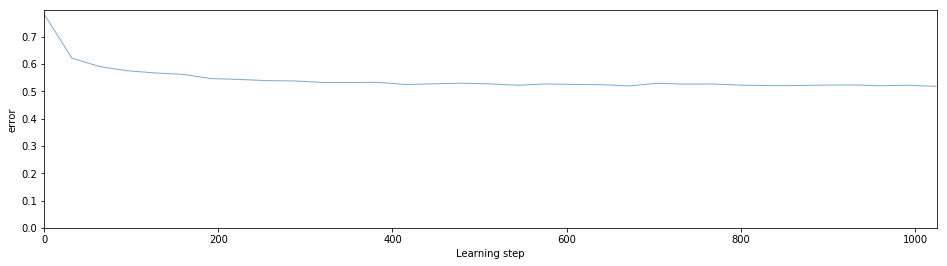

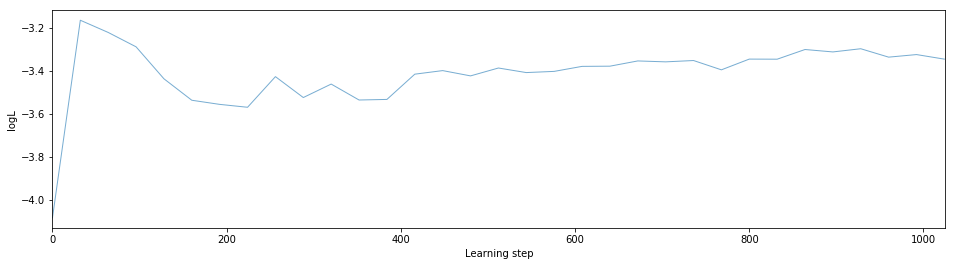

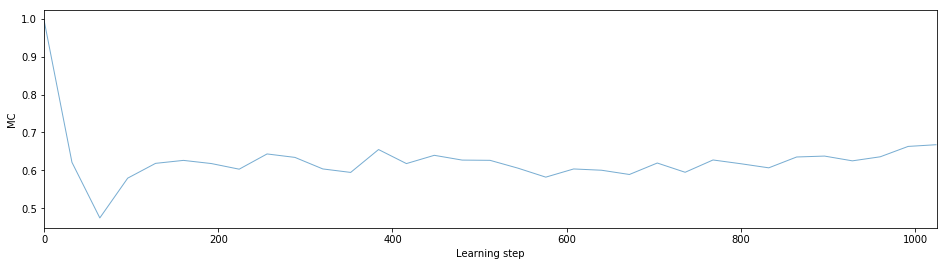

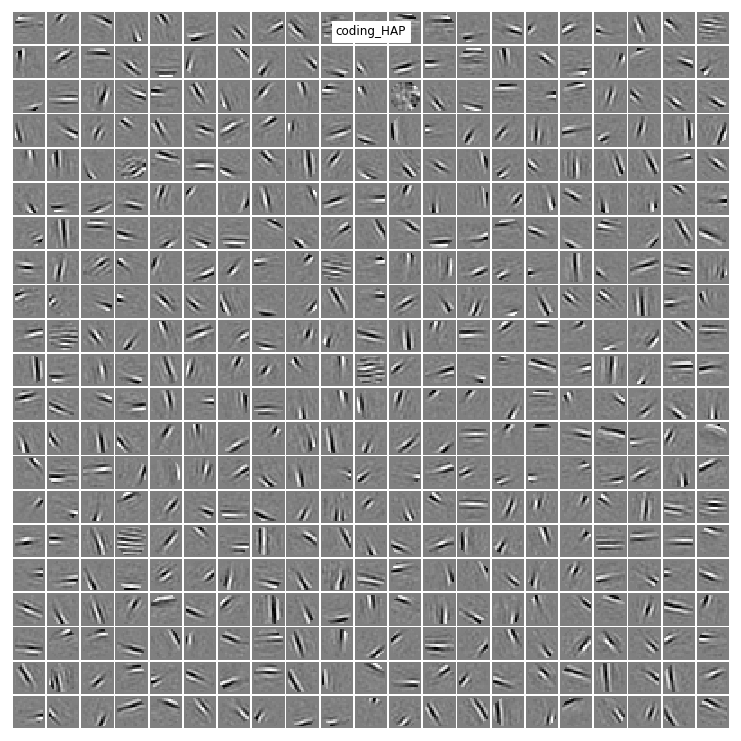

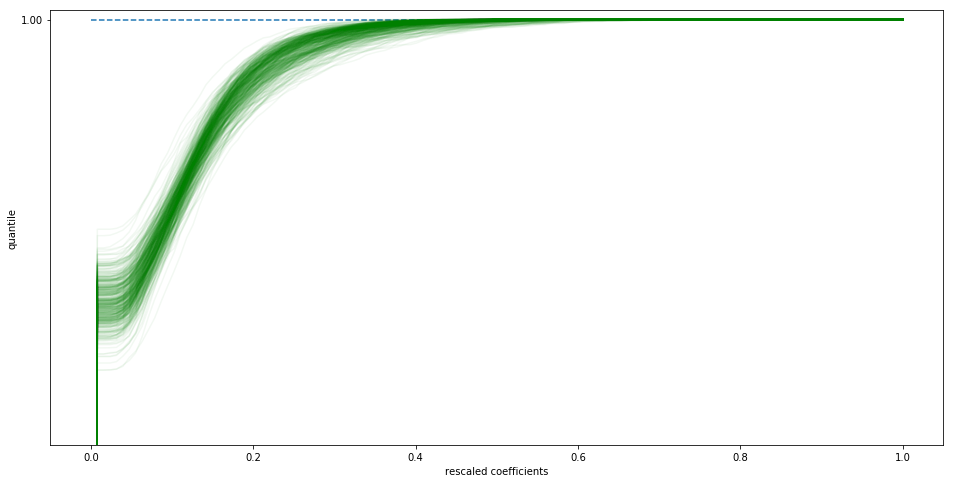

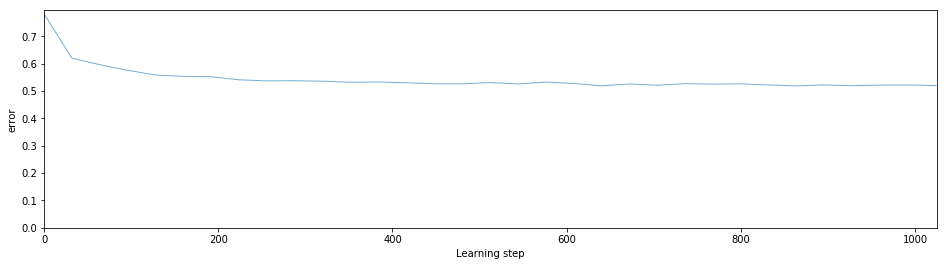

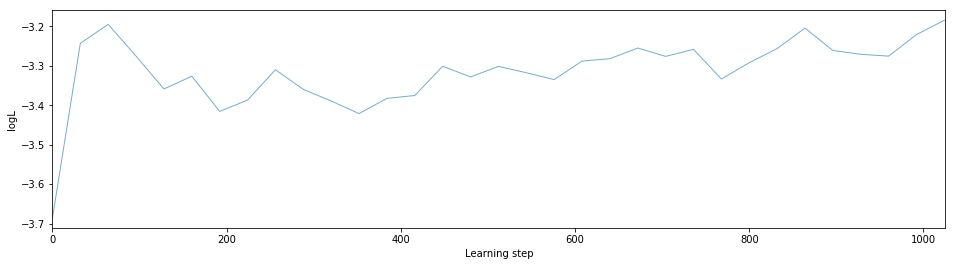

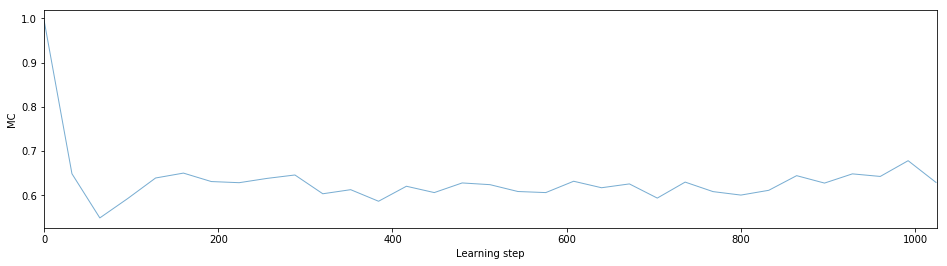

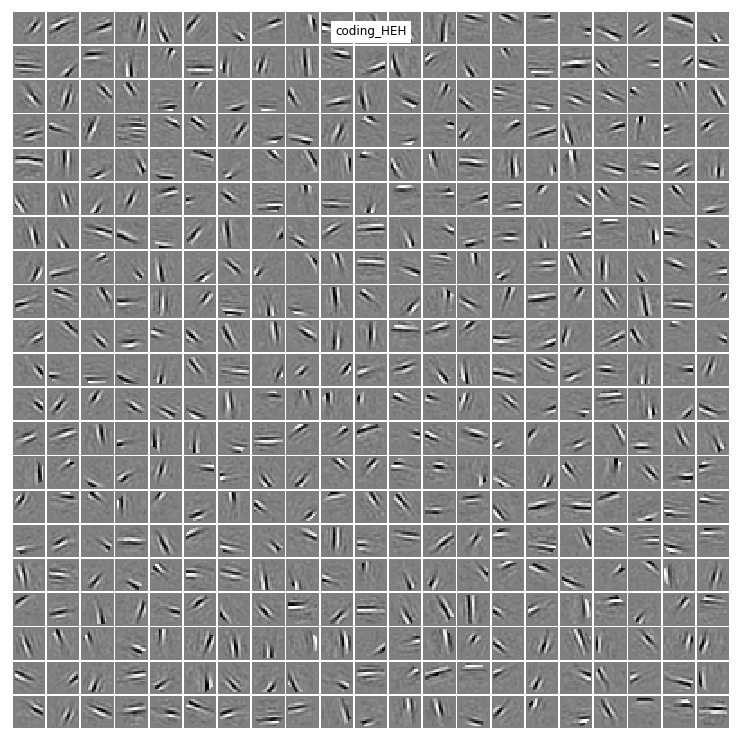

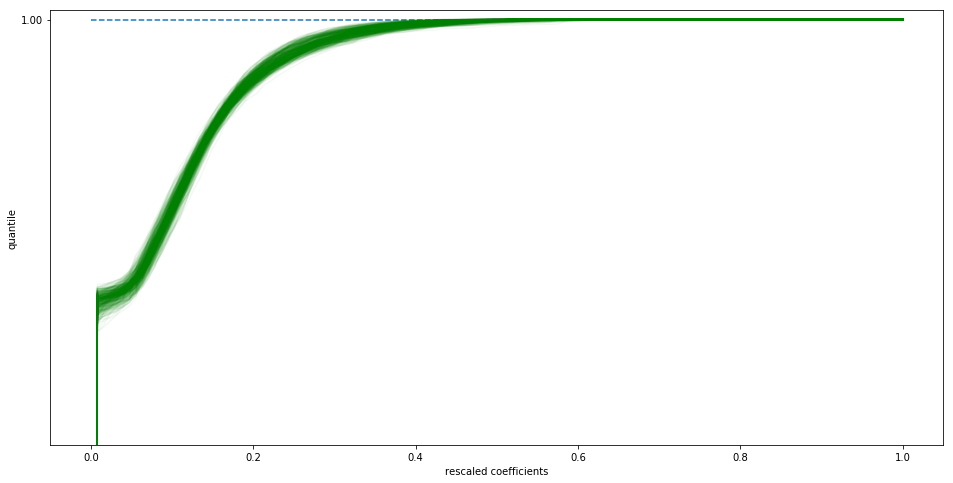

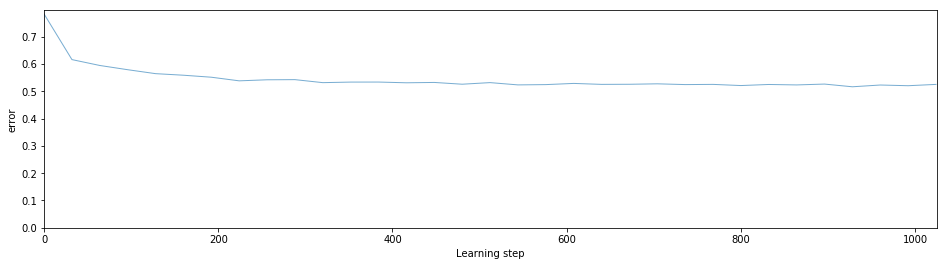

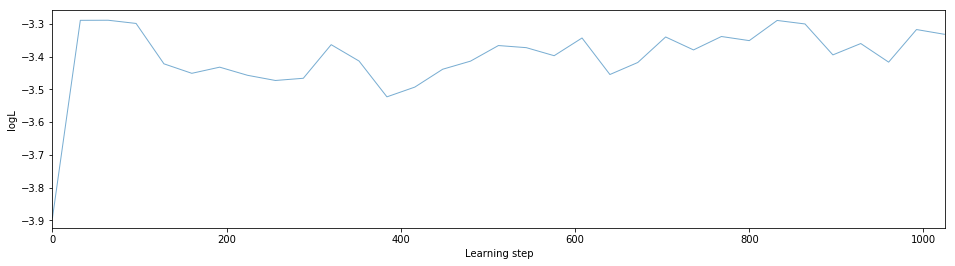

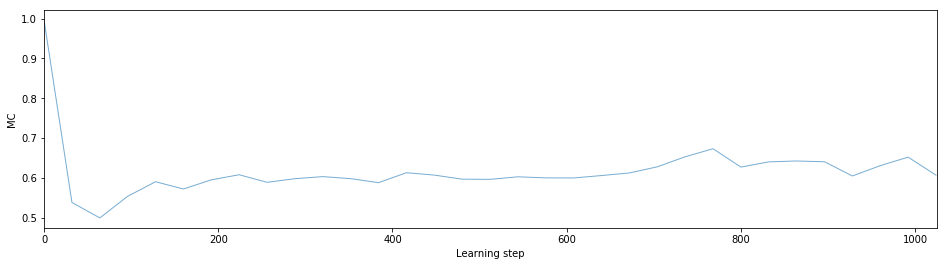

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 10*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019513745561237982
average std of codewords =  0.13502746276049485
l0-sparseness of codewords =  0.029404274730725623
std of the average of individual patches =  0.002900699567429507


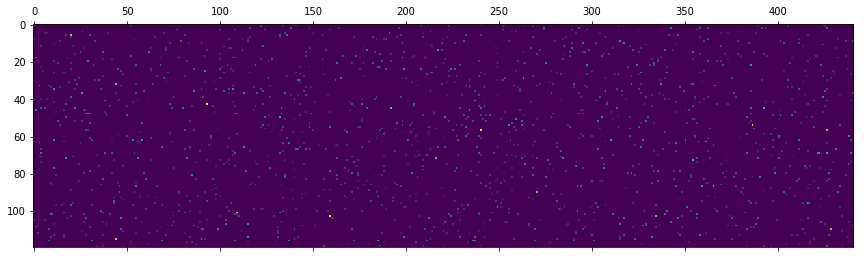

<Figure size 1080x216 with 0 Axes>

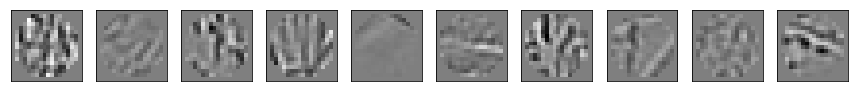

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

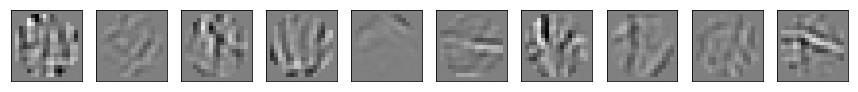

<Figure size 1080x216 with 0 Axes>

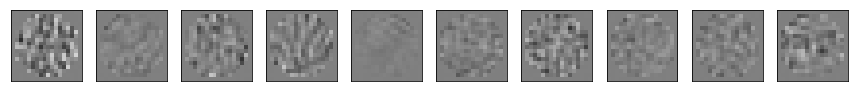

average of data patches =  -7.789408238047528e-05 +/- 0.0054876997714250475
average of residual patches =  -0.00021645987101866635 +/- 0.004479807497955748
median energy of data =  0.16632784687727026
average energy of data =  0.17372211602649013 +/- 0.06783404409605083
average error =  -0.00021645987101866635 +/- 0.09759338304017663
average energy of residual =  0.09022894618513833 +/- 0.037192103172875454
median energy of residual =  0.0878635232135707
average gain of coding =  1.9807984097516098 +/- 0.4133479535894755
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01951374556123798
average std of codewords =  0.13502746276049482
l0-sparseness of codewords =  0.029404274730725623
std of the average of individual patches =  0.0029006995674295075


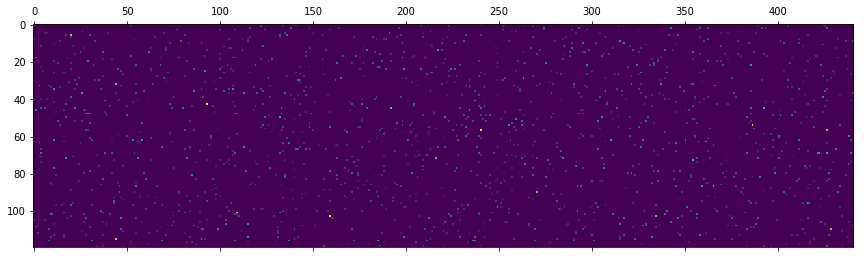

<Figure size 1080x216 with 0 Axes>

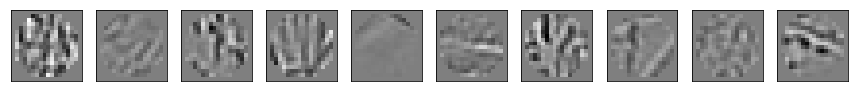

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

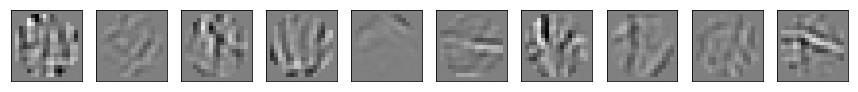

<Figure size 1080x216 with 0 Axes>

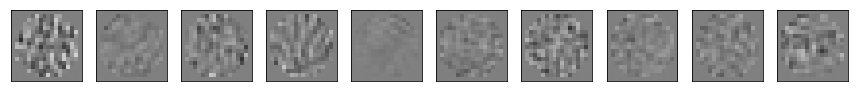

average of data patches =  -7.789408238047528e-05 +/- 0.0054876997714250475
average of residual patches =  -0.00021645987101866614 +/- 0.004479807497955748
median energy of data =  0.16632784687727026
average energy of data =  0.17372211602649013 +/- 0.06783404409605083
average error =  -0.00021645987101866614 +/- 0.09759338304017663
average energy of residual =  0.09022894618513833 +/- 0.03719210317287546
median energy of residual =  0.0878635232135707
average gain of coding =  1.9807984097516096 +/- 0.4133479535894755
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01744139596276433
average std of codewords =  0.1311038610637505
l0-sparseness of codewords =  0.02806343891723356
std of the average of individual patches =  0.008306971759120676


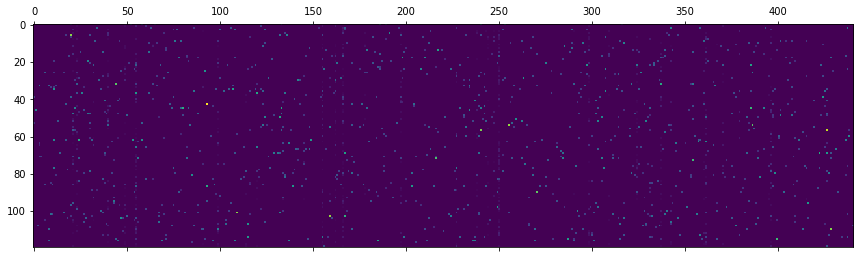

<Figure size 1080x216 with 0 Axes>

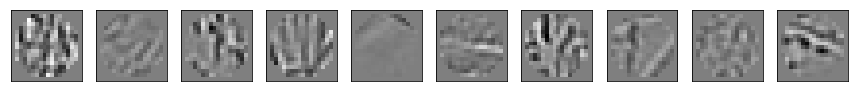

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

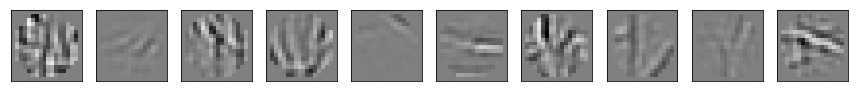

<Figure size 1080x216 with 0 Axes>

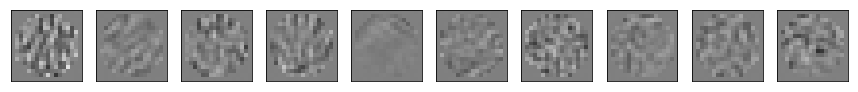

average of data patches =  -7.789408238047528e-05 +/- 0.0054876997714250475
average of residual patches =  -0.00045510137772931876 +/- 0.004676714026509319
median energy of data =  0.16632784687727026
average energy of data =  0.17372211602649013 +/- 0.06783404409605083
average error =  -0.00045510137772931876 +/- 0.10532715051765927
average energy of residual =  0.10012760907832603 +/- 0.03268757644261174
median energy of residual =  0.09773045640531403
average gain of coding =  1.721971032154296 +/- 0.34804298165653313
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019523927419554908
average std of codewords =  0.13522932744826452
l0-sparseness of codewords =  0.029417007688492064
std of the average of individual patches =  0.002883398128871453


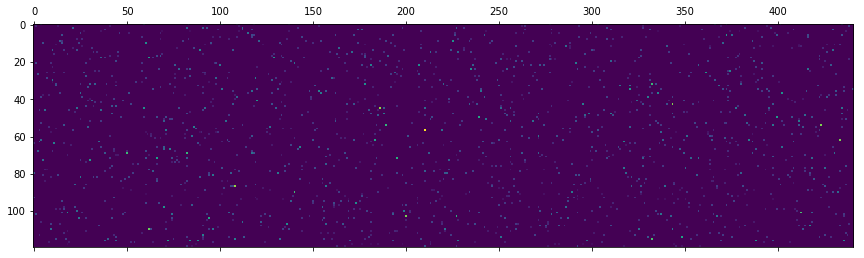

<Figure size 1080x216 with 0 Axes>

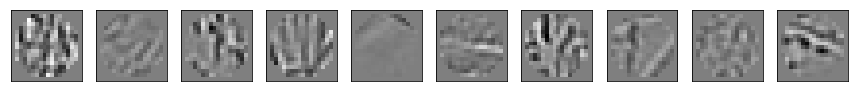

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

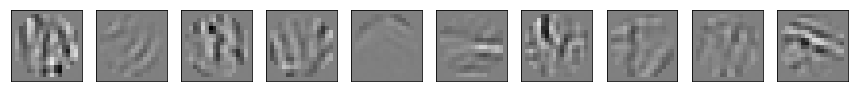

<Figure size 1080x216 with 0 Axes>

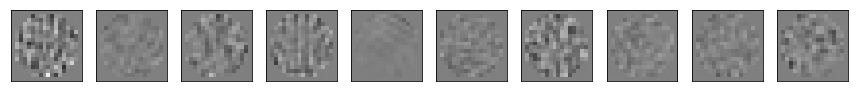

average of data patches =  -7.789408238047528e-05 +/- 0.0054876997714250475
average of residual patches =  -0.00032888623686232145 +/- 0.004322695154178057
median energy of data =  0.16632784687727026
average energy of data =  0.17372211602649013 +/- 0.06783404409605083
average error =  -0.00032888623686232145 +/- 0.09720387516624522
average energy of residual =  0.08987512887666338 +/- 0.03702921445149674
median energy of residual =  0.08751877571509536
average gain of coding =  1.9903629667642275 +/- 0.4262996192433071
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019523927419554908
average std of codewords =  0.1352293274482645
l0-sparseness of codewords =  0.029417007688492064
std of the average of individual patches =  0.002883398128871453


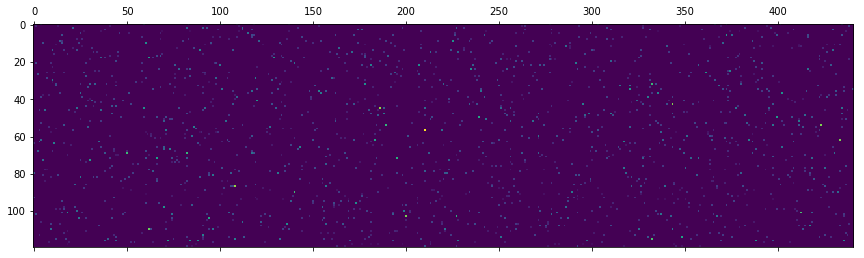

<Figure size 1080x216 with 0 Axes>

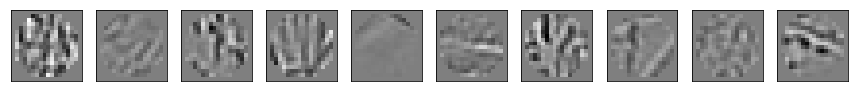

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

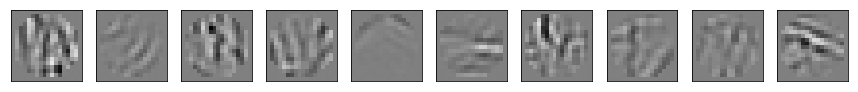

<Figure size 1080x216 with 0 Axes>

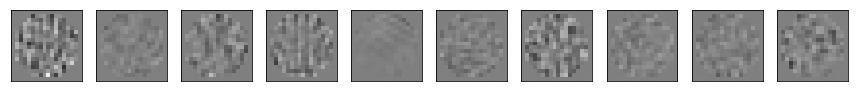

average of data patches =  -7.789408238047528e-05 +/- 0.0054876997714250475
average of residual patches =  -0.00032888623686232155 +/- 0.004322695154178057
median energy of data =  0.16632784687727026
average energy of data =  0.17372211602649013 +/- 0.06783404409605083
average error =  -0.00032888623686232155 +/- 0.09720387516624522
average energy of residual =  0.08987512887666337 +/- 0.03702921445149674
median energy of residual =  0.08751877571509536
average gain of coding =  1.9903629667642275 +/- 0.4262996192433071
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.018124460008643487
average std of codewords =  0.13258528204963163
l0-sparseness of codewords =  0.028199072597789115
std of the average of individual patches =  0.00803147619802187


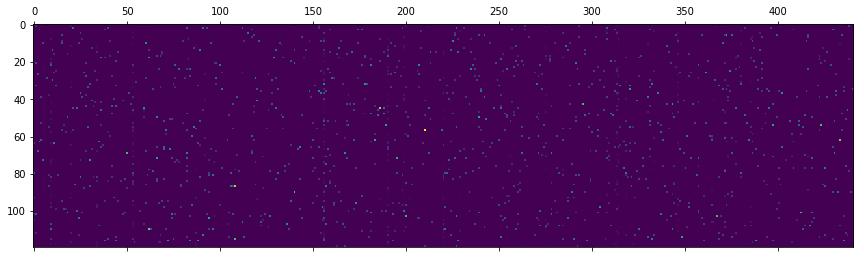

<Figure size 1080x216 with 0 Axes>

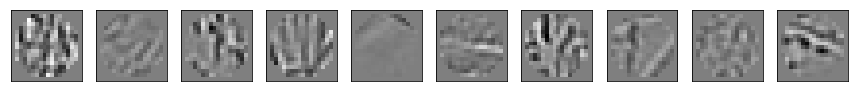

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

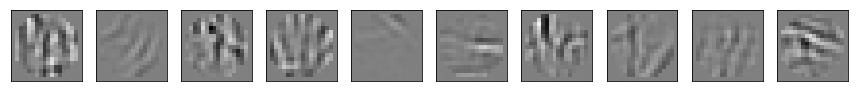

<Figure size 1080x216 with 0 Axes>

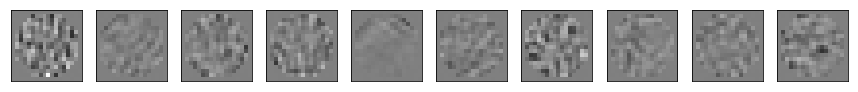

average of data patches =  -7.789408238047528e-05 +/- 0.0054876997714250475
average of residual patches =  -0.00031948652375747636 +/- 0.004546474421847793
median energy of data =  0.16632784687727026
average energy of data =  0.17372211602649013 +/- 0.06783404409605083
average error =  -0.00031948652375747636 +/- 0.102531440525093
average energy of residual =  0.09688627916012671 +/- 0.03355364776437189
median energy of residual =  0.09317926581648484
average gain of coding =  1.7887119771394882 +/- 0.35970456709432264
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019453546353625794
average std of codewords =  0.1348128370797601
l0-sparseness of codewords =  0.029417007688492064
std of the average of individual patches =  0.002615645435739417


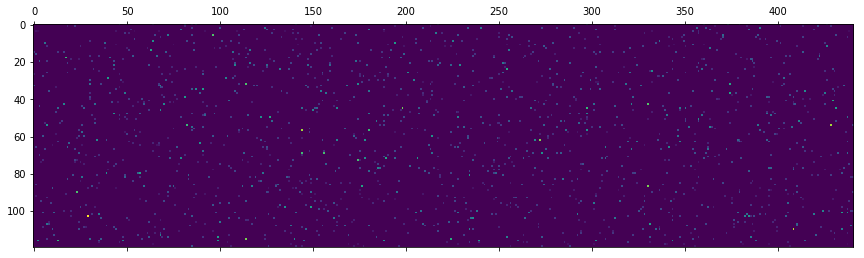

<Figure size 1080x216 with 0 Axes>

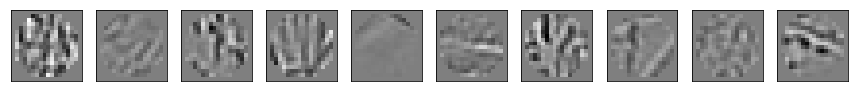

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

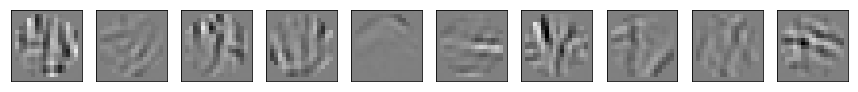

<Figure size 1080x216 with 0 Axes>

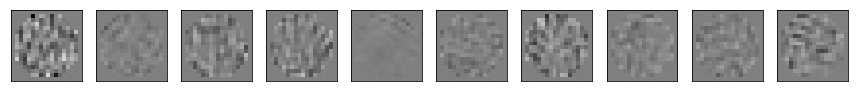

average of data patches =  -7.789408238047528e-05 +/- 0.0054876997714250475
average of residual patches =  2.798482295666541e-05 +/- 0.004441657188460882
median energy of data =  0.16632784687727026
average energy of data =  0.17372211602649013 +/- 0.06783404409605083
average error =  2.798482295666541e-05 +/- 0.09791384122184495
average energy of residual =  0.09043526721025846 +/- 0.037531100844181584
median energy of residual =  0.08786146719814275
average gain of coding =  1.9804205979237626 +/- 0.4226652609271103
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019453546353625794
average std of codewords =  0.1348128370797601
l0-sparseness of codewords =  0.029417007688492064
std of the average of individual patches =  0.002615645435739417


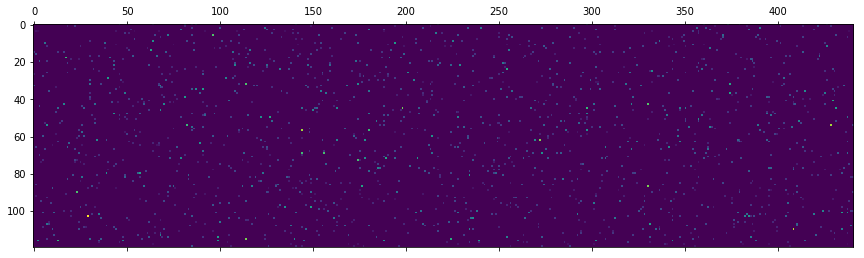

<Figure size 1080x216 with 0 Axes>

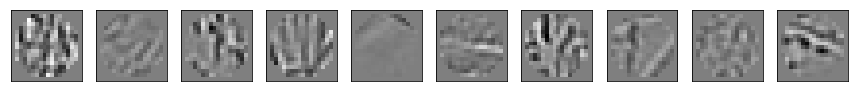

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

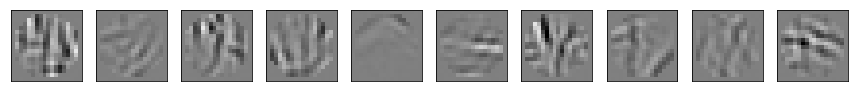

<Figure size 1080x216 with 0 Axes>

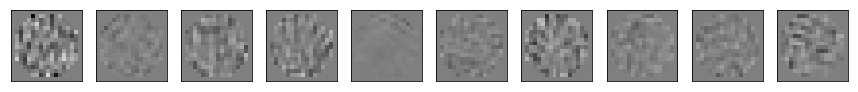

average of data patches =  -7.789408238047528e-05 +/- 0.0054876997714250475
average of residual patches =  2.7984822956665584e-05 +/- 0.004441657188460882
median energy of data =  0.16632784687727026
average energy of data =  0.17372211602649013 +/- 0.06783404409605083
average error =  2.7984822956665584e-05 +/- 0.09791384122184495
average energy of residual =  0.09043526721025846 +/- 0.037531100844181584
median energy of residual =  0.08786146719814275
average gain of coding =  1.9804205979237623 +/- 0.4226652609271103
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019194497727569437
average std of codewords =  0.1344028087918354
l0-sparseness of codewords =  0.02937548717403628
std of the average of individual patches =  0.0030423285356570005


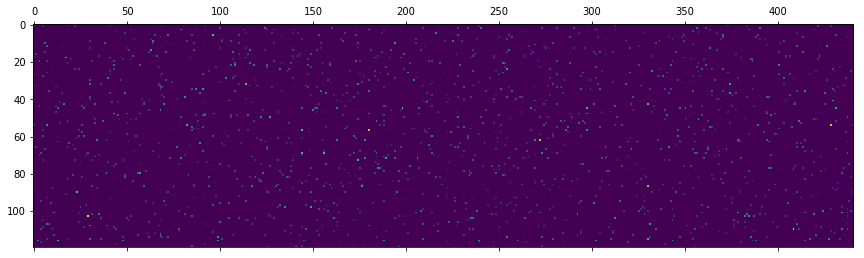

<Figure size 1080x216 with 0 Axes>

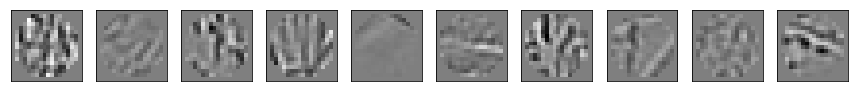

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

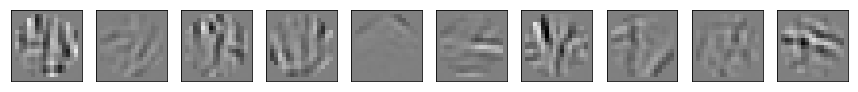

<Figure size 1080x216 with 0 Axes>

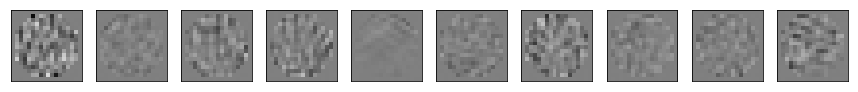

average of data patches =  -7.789408238047528e-05 +/- 0.0054876997714250475
average of residual patches =  6.840256975246595e-05 +/- 0.004490241739171952
median energy of data =  0.16632784687727026
average energy of data =  0.17372211602649013 +/- 0.06783404409605083
average error =  6.840256975246595e-05 +/- 0.0987438597736809
average energy of residual =  0.09181698598667735 +/- 0.036331743781962855
median energy of residual =  0.08825198973406087
average gain of coding =  1.9256167252737781 +/- 0.389447571949328


In [8]:
np.random.seed(1973)
#sparse_code = shl.code(data, dico_, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico_.P_cum
#P_cum = None
#l0_sparseness = 150
l0_sparseness = shl.l0_sparseness


from shl_scripts.shl_tools import show_data, print_stats
coding_gain = {}
for homeo_method in homeo_methods:
    coding_gain[homeo_method] = {}
    print(42*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(42*'🐶')

    from shl_scripts.shl_encode import mp
    labels = ['Non', 'One', 'Hom']
    for P_cum, gain, label in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None], labels):
        sparse_code = mp(data[indx, :], dico[homeo_method].dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
        SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)
        coding_gain[homeo_method][label] = (SD/SE).mean()


In [9]:
coding_gain

{'None': {'Non': 1.9807984097516098,
  'One': 1.9807984097516096,
  'Hom': 1.721971032154296},
 'HAP': {'Non': 1.9903629667642275,
  'One': 1.9903629667642275,
  'Hom': 1.7887119771394882},
 'HEH': {'Non': 1.9804205979237626,
  'One': 1.9804205979237623,
  'Hom': 1.9256167252737781}}

## Version used

In [10]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
Fri Sep 07 15:02:01 2018 CEST